## "03_Run_Inversion" Replication

This is where we run the inversion based on the pprevious work.

### Questions:

 - What is a good threshold that we can use for VR to get rid of stations or when we call it good?
 - If the Z is shifted back and the T is shifted forward, should I shift the waveform? What component should I give preference to?
 - How do I use only one or two components?
     - Modify the mtinv.in file to say 100 for vertical, 110 for V and R, 011 for R and T and so on

-----
## Moment Tensor Inversion using `MTtime`

Now we can start the inversion using the input file we created.

- LLNL-CODE-830725
- SPDX-License-Identifier: LGPL-3.0

In [1]:
import mttime
import os

In [2]:
# Call the Configure object to read the input file and set up the inversion
#Modify the file and get rid of the commas
model = 'north_mangystau'
config = mttime.Configure(path_to_file="%s/mtinv.in"%model)

# Quick look at the attributes
print(config)

       event: {'datetime': '1970-12-23T07:00:59.000000Z', 'longitude': 54.8973, 'latitude': 43.8858}
       depth: [1.0]
       green: herrmann
  components: ['Z', 'R', 'T']
      degree: 5
      weight: distance
        plot: False
   correlate: False

| STATION TABLE |
     station  distance  azimuth  ts  npts   dt  Z  R  T  longitude  latitude
WWSSN.TAB.00    967.55   231.25  30   300 1.00  0  0  0      46.33     38.07
WWSSN.SHI.00   1592.42   188.52  30   450 1.00  0  0  0      52.51     29.64
WWSSN.KBL.00   1595.23   125.67  25   500 1.00  1  0  0      69.04     34.54
WWSSN.QUE.00   1852.26   141.01  32   500 1.00  1  0  0      66.95     30.19
WWSSN.NIL.00   1947.81   119.40  27   550 1.00  1  0  0      73.25     33.65


### Figure options
 - `view="waveform"` to show the solution and waveform fits.
 - `view="depth"` to show solution as a function of source depth.
 - `view="map"` plots solution on a map.
 - `view="lune"` plots the full moment tensor source-type on a lune.
 
- To save figure to file set `show=False`



Things that we can modify in the mtinv.in file are:
- Look at the VR in each waveform, and if it is shifted, then change the ts, but if it doesn't even look alike then get rid of it.

- The time shift moves forward. (i.e. ts 40 moves the waveform forwards 10 seconds)

/Users/martinetti1/.conda/envs/research/lib/python3.9/site-packages/mttime-1.0.0-py3.9.egg/mttime/core/inversion.py:184: UserWarning: Warning: converting a masked element to nan.
  station_VR[i] = (1 - var) * 100


Deviatoric Moment Tensor Inversion
Depth = 1.0000 km
Mw = 5.61
Percent DC/CLVD/ISO = 97/3/0
VR = 64.39%



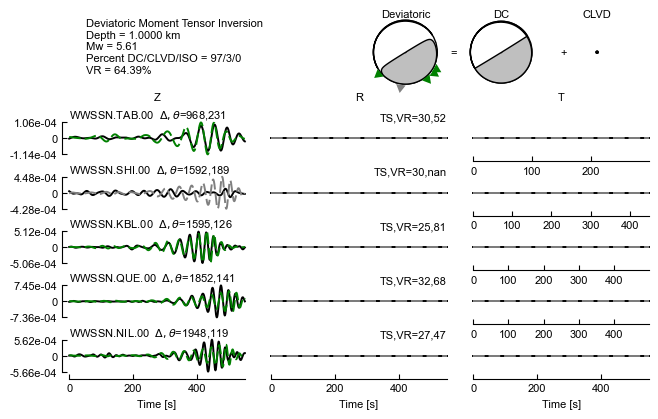

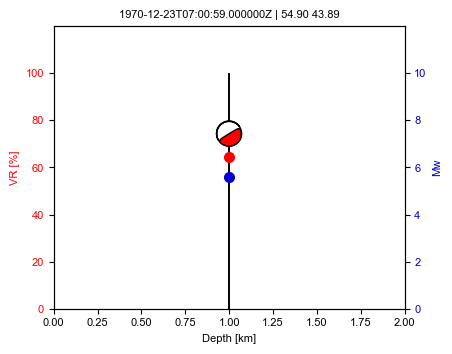

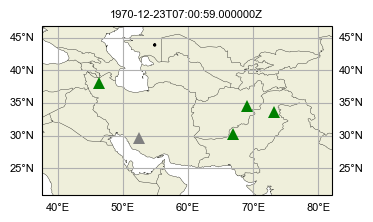

0

In [3]:
#Deviatoric MT Inversion
#config = mttime.Configure(path_to_file="%s/mtinv.in"%green_dir)
config = mttime.Configure(path_to_file="%s/mtinv.in"%model)
tdmt = mttime.Inversion(config=config)
tdmt.invert()

# Plot waveform fits of the best solution (highest VR)
tdmt.plot(view="waveform", show=False)
tdmt.plot(view="waveform", show=True)
tdmt.plot(view="depth", show=True)
tdmt.plot(view="map", show=True)

os.system("mv *.eps %s/"%model)
os.system("open %s/bbwaves.d01.0000.00.eps"%model)

/Users/martinetti1/.conda/envs/research/lib/python3.9/site-packages/mttime-1.0.0-py3.9.egg/mttime/core/inversion.py:184: UserWarning: Warning: converting a masked element to nan.
  station_VR[i] = (1 - var) * 100


Full Moment Tensor Inversion
Depth = 1.0000 km
Mw = 6.07
Percent DC/CLVD/ISO = 23/23/54
VR = 69.90%

changed order!!



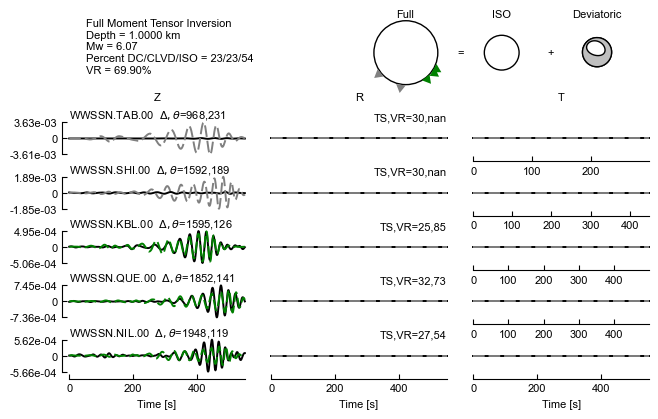

changed order!!

changed order!!



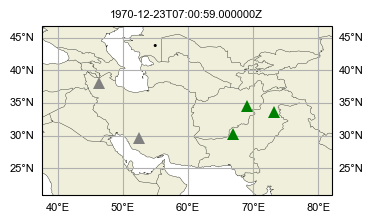

changed order!!



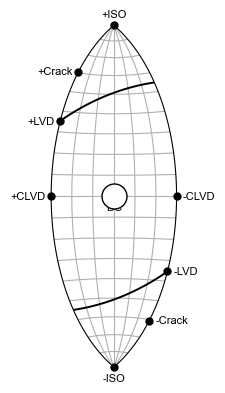

In [3]:
# Compute full moment tensor and plot the result on the lune.
config = mttime.Configure(path_to_file="%s/mtinv.in"%model, degree=6)
tdmt = mttime.Inversion(config=config)
tdmt.invert()
tdmt.plot(view="waveform", show=True)
tdmt.plot(view="waveform", show=False)
tdmt.plot(view="map", show=True)
tdmt.plot(view="lune", show=True)